# ProductHunt Products from the January 2023

In [150]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from matplotlib.dates import DateFormatter
import networkx as nx
from adjustText import adjust_text
import plotly.graph_objects as go


In [151]:
# Step 1: Load the Dataset
# df = pd.read_csv("C:/Users/alime/Dropbox/PC/Documents/Coding/2023/ProductHunt_EDA_and_Unspervised_Sentiment_Analysis/Data/Stats/CSV/Stats_Year_2022.csv")
df = pd.read_csv("C:/Users/alime/Dropbox/PC/Documents/Coding/2023/ProductHunt_EDA_and_Unspervised_Sentiment_Analysis/Data/Stats/CSV/Posts_Jan_2023_Fix_Cleaned.csv")

In [152]:
df.head()

,id,name,votesCount,reviewsRating,reviewsCount,commentsCount,createdAt,totalCount,topics
0,377488,Perplexity.ai,214,0.0,0,19,2023-02-01T01:10:23Z,20,Search
1,377270,Image Editor AI,46,0.0,0,11,2023-02-01T08:00:00Z,15,"Design Tools, Marketing, Tech"
2,377466,RoboHelper,21,0.0,0,5,2023-01-31T21:41:01Z,3,Productivity
3,376463,Dover Autopilot,1118,0.0,0,134,2023-01-31T08:03:56Z,20,"Hiring, Artificial Intelligence"
4,377244,Unlimited Voice Transcription with API,873,0.0,0,229,2023-01-31T08:12:31Z,20,"Productivity, Privacy"


In [153]:
df.shape

(40320, 9)

In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40320 entries, 0 to 40319
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             40320 non-null  int64  
 1   name           40320 non-null  object 
 2   votesCount     40320 non-null  int64  
 3   reviewsRating  40320 non-null  float64
 4   reviewsCount   40320 non-null  int64  
 5   commentsCount  40320 non-null  int64  
 6   createdAt      40320 non-null  object 
 7   totalCount     40320 non-null  int64  
 8   topics         40320 non-null  object 
dtypes: float64(1), int64(5), object(3)
memory usage: 2.8+ MB


# Step 2: Data Cleaning

In [155]:
# Check for missing values
print(df.isnull().sum())

id               0
name             0
votesCount       0
reviewsRating    0
reviewsCount     0
commentsCount    0
createdAt        0
totalCount       0
topics           0
dtype: int64


In [156]:
df.describe()

,id,votesCount,reviewsRating,reviewsCount,commentsCount,totalCount
count,40320.000000,40320.000000,40320.0,40320.0,40320.000000,40320.000000
mean,375590.076860,150.859400,0.0,0.0,27.822197,10.642684
std,1232.294971,252.254059,0.0,0.0,51.294438,6.884244
min,369053.000000,1.000000,0.0,0.0,0.000000,0.000000
25%,374814.000000,28.000000,0.0,0.0,3.000000,4.000000
50%,375793.000000,60.000000,0.0,0.0,8.000000,9.000000
75%,376501.000000,161.000000,0.0,0.0,26.000000,19.000000
max,377488.000000,3338.000000,0.0,0.0,478.000000,20.000000


### Remove the reviewRating and reviewsCount columns since they are always 0

In [157]:
df = df.drop('reviewsRating', axis=1)
df = df.drop('reviewsCount', axis=1)

In [158]:
df.head()

,id,name,votesCount,commentsCount,createdAt,totalCount,topics
0,377488,Perplexity.ai,214,19,2023-02-01T01:10:23Z,20,Search
1,377270,Image Editor AI,46,11,2023-02-01T08:00:00Z,15,"Design Tools, Marketing, Tech"
2,377466,RoboHelper,21,5,2023-01-31T21:41:01Z,3,Productivity
3,376463,Dover Autopilot,1118,134,2023-01-31T08:03:56Z,20,"Hiring, Artificial Intelligence"
4,377244,Unlimited Voice Transcription with API,873,229,2023-01-31T08:12:31Z,20,"Productivity, Privacy"


## Change the date column type to DataTime

In [159]:
df['createdAt'] = pd.to_datetime(df['createdAt'])

## Delete  Duplicates based on the Name and Date

In [160]:
df.drop_duplicates(subset=['name', 'createdAt'], keep='first', inplace=True)

In [161]:
df.shape

(1260, 7)

In [162]:
# # Find the oldest and youngest dates
# oldest_date = df['createdAt'].min()
# youngest_date = df['createdAt'].max()

# # Print the results
# print("Oldest Date:", oldest_date)
# print("Youngest Date:", youngest_date)

## Extracting the frequencies of topic groups

In [163]:
topic_frequency = df['topics'].apply(lambda x: tuple(sorted(set(x.split(', '))))).value_counts()

freq = {}
# # Display the result
for topic_group, frequency in topic_frequency.items():
    freq[topic_group]= frequency

# Create a new dictionary to store the modified keys
Topic_grq_frq = {}
# Iterate through the original dictionary
for key, value in freq.items():
    # Check if the key is a tuple
    if isinstance(key, tuple):
        # Remove the trailing comma by converting the tuple to a single-element tuple
        modified_key = key[0] if len(key) == 1 else key
        Topic_grq_frq[modified_key] = value
    else:
        # If the key is not a tuple, simply copy it to the modified dictionary
        Topic_grq_frq[key] = value

print(Topic_grq_frq)
# Convert the dictionary to a DataFrame
Topic_grq_frq_df = pd.DataFrame(Topic_grq_frq.items(), columns=['topic', 'frequency'])
print(Topic_grq_frq_df.shape)
Topic_grq_frq_df.head()

{('Artificial Intelligence', 'Productivity', 'Tech'): 13, 'Artificial Intelligence': 11, 'Productivity': 10, ('Developer Tools', 'Productivity', 'Tech'): 10, ('Android', 'Productivity', 'iOS'): 8, 'Tech': 8, ('Artificial Intelligence', 'Marketing', 'Productivity'): 7, ('Artificial Intelligence', 'Chrome Extensions', 'Productivity'): 6, ('Notion', 'Productivity', 'Task Management'): 6, ('Marketing', 'Productivity', 'Tech'): 6, ('Artificial Intelligence', 'SaaS'): 5, ('Artificial Intelligence', 'Marketing', 'Writing'): 5, ('Artificial Intelligence', 'Productivity', 'Writing'): 5, ('Design Tools', 'Developer Tools', 'Productivity'): 5, ('Artificial Intelligence', 'Email', 'Productivity'): 4, ('Productivity', 'Task Management', 'Time Tracking'): 4, ('Developer Tools', 'GitHub'): 4, 'Marketing': 4, ('Developer Tools', 'Open Source', 'Software Engineering'): 4, ('Developer Tools', 'GitHub', 'Open Source'): 4, ('Artificial Intelligence', 'Productivity', 'SaaS'): 4, ('Artificial Intelligence',

,topic,frequency
0,"(Artificial Intelligence, Productivity, Tech)",13
1,Artificial Intelligence,11
2,Productivity,10
3,"(Developer Tools, Productivity, Tech)",10
4,"(Android, Productivity, iOS)",8


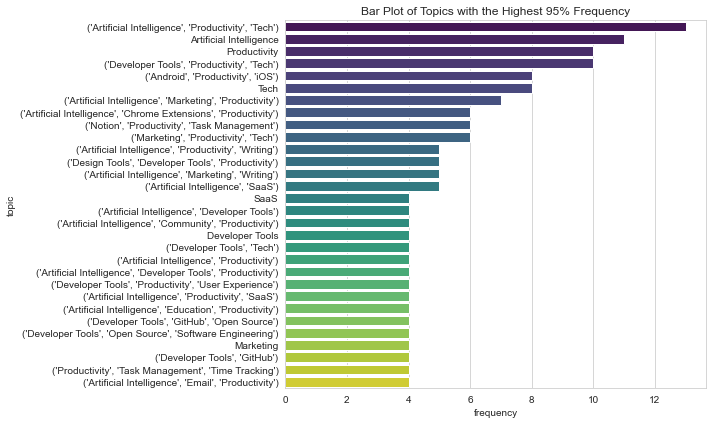

In [164]:

# Step 2: Sort the DataFrame by 'Frequency' in descending order
df_sorted = Topic_grq_frq_df.sort_values(by='frequency', ascending=False)

# Step 3: Calculate the threshold for the highest 50% of the data
threshold = df_sorted['frequency'].quantile(0.95)

# Step 4: Filter the DataFrame to keep only the rows with frequencies greater than the threshold
df_filtered = df_sorted[df_sorted['frequency'] > threshold]

# Step 5: Create the bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='frequency', y='topic', data=df_filtered, palette='viridis', dodge=False) # Add dodge=False to increase bar spacing
plt.xlabel('frequency')
plt.ylabel('topic')
plt.title('Bar Plot of Topics with the Highest 95% Frequency')

# Rotate the y-axis labels for better readability
# plt.yticks(rotation=45)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## Extracting the frequencies of individual topics 

In [165]:
# Split the topics column and create a list of all topics
all_topics = df['topics'].str.split(',').explode()
all_topics.tolist()

# Removing leading spaces from each string in the list
all_topics = [s.lstrip() for s in all_topics]
print("\nList of all topics (all_topics):")
print(all_topics)

# Assuming you have a list of items called 'items'
item_freq = pd.Series(all_topics).value_counts().reset_index()

# Rename the columns
item_freq.columns = ['topic', 'frequency']

# Display the DataFrame
print(item_freq)

item_freq.head()



List of all topics (all_topics):
['Search', 'Design Tools', 'Marketing', 'Tech', 'Productivity', 'Hiring', 'Artificial Intelligence', 'Productivity', 'Privacy', 'Crypto', 'Games', 'Web3', 'Android', 'iOS', 'E-Commerce', 'Productivity', 'Task Management', 'SaaS', 'Mac', 'Design Tools', 'Developer Tools', 'Newsletters', 'Marketing', 'E-Commerce', 'Android', 'iOS', 'News', 'Education', 'Tech', 'Side Project', 'Productivity', 'Open Source', 'GitHub', 'Productivity', 'User Experience', 'UX Design', 'Mac', 'Productivity', 'Developer Tools', 'Productivity', 'Marketing', 'Artificial Intelligence', 'Chrome Extensions', 'Productivity', 'Social Media', 'Productivity', 'Marketing', 'Developer Tools', 'Design Tools', 'Augmented Reality', '3D Modeling', 'Design Tools', 'Productivity', 'Sales', 'Messaging', 'Artificial Intelligence', 'Bots', 'Fintech', 'Investing', 'Android', 'Privacy', 'Security', 'Kids', 'Education', 'Books', 'Web App', 'Software Engineering', 'Developer Tools', 'News', 'Social Ne

,topic,frequency
0,Productivity,382
1,Artificial Intelligence,320
2,Tech,158
3,Developer Tools,157
4,Marketing,132


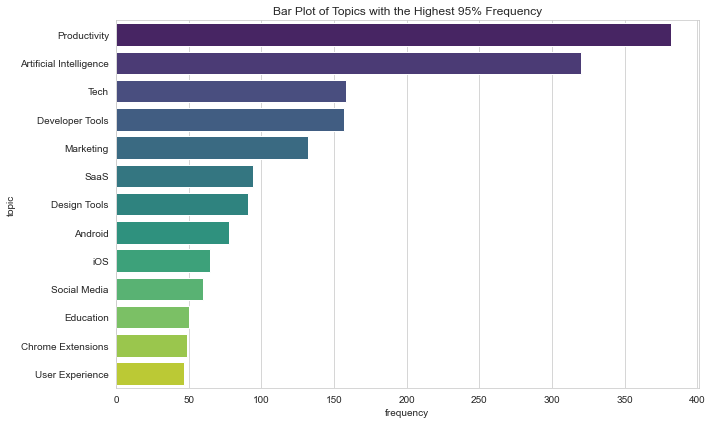

In [166]:

# Step 2: Sort the DataFrame by 'Frequency' in descending order
df_sorted = item_freq.sort_values(by='frequency', ascending=False)

# Step 3: Calculate the threshold for the highest 50% of the data
threshold = df_sorted['frequency'].quantile(0.95)

# Step 4: Filter the DataFrame to keep only the rows with frequencies greater than the threshold
df_filtered = df_sorted[df_sorted['frequency'] > threshold]

# Step 5: Create the bar plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='frequency', y='topic', data=df_filtered, palette='viridis', dodge=False) # Add dodge=False to increase bar spacing
plt.xlabel('frequency')
plt.ylabel('topic')
plt.title('Bar Plot of Topics with the Highest 95% Frequency')

# Rotate the y-axis labels for better readability
# plt.yticks(rotation=45)

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## Daily Product Launches 

### Histogram 

    createdAt  product_count
0  2022-12-31             35
1  2023-01-01             24
2  2023-01-02             32
3  2023-01-03             30
4  2023-01-04             34


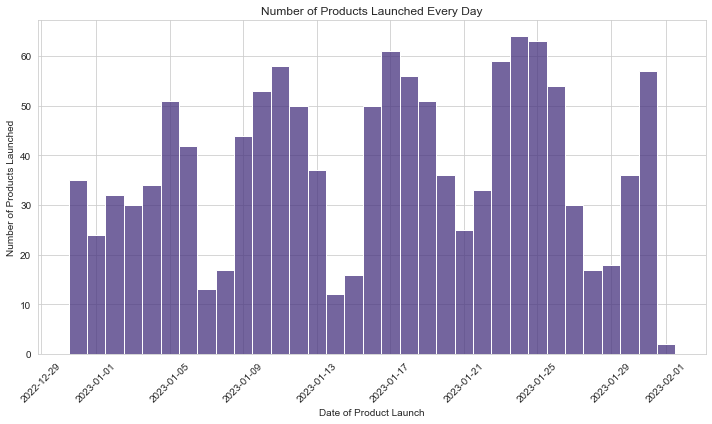

In [167]:
# Convert the 'createdAt' column to a proper datetime data type:
df['createdAt'] = pd.to_datetime(df['createdAt']).dt.date

# Group the data by the 'createdAt' date and count the number of products launched each day:
product_count_per_day = df.groupby('createdAt').size().reset_index(name='product_count')
print(product_count_per_day.head())


# Plot the histogram using Seaborn
plt.figure(figsize=(10, 6))
sns.histplot(data=product_count_per_day, x='createdAt', weights='product_count', bins=len(product_count_per_day['createdAt']), kde=False)
plt.xlabel('Date of Product Launch')
plt.ylabel('Number of Products Launched')
plt.title('Number of Products Launched Every Day')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Line Plot

In [168]:
# Step: Create the line plot using Plotly
fig = go.Figure()

# Use a modern color palette, 'viridis' is a good choice, but you can also try other color scales from Plotly (e.g., 'plasma', 'inferno', 'magma')
color_scale = 'Viridis'

# Create the line plot
fig.add_trace(go.Scatter(x=product_count_per_day['createdAt'], y=product_count_per_day['product_count'],
                         mode='lines+markers', marker=dict(color=product_count_per_day['product_count'],
                                                           colorscale=color_scale),
                         line=dict(color='darkblue', width=2)))

# Customize the layout for a modern look
fig.update_layout(
    title='Number of Products Launched Every Day',
    xaxis_title='Date of Product Launch',
    yaxis_title='Number of Products Launched',
    xaxis=dict(tickangle=-45, tickfont=dict(size=12)),
    yaxis=dict(tickfont=dict(size=12)),
    plot_bgcolor='#f5f5f5',  # Add a background color to the plot for a cleaner appearance
    paper_bgcolor='white',   # Set the background color of the plot area
    font=dict(size=14, color='black'),  # Use a larger font size and black color for the title and labels
    margin=dict(l=60, r=20, t=80, b=60),  # Add some margins to the plot
    height=600  # Set the height of the plot to 600 pixels (adjust as needed)
)

# Show the plot
fig.show()


# # Set the style to a modern theme (e.g., 'darkgrid', 'whitegrid', 'dark', 'white', or 'ticks')
# sns.set_style('whitegrid')

# # Step: Plot the line plot using Seaborn
# plt.figure(figsize=(12, 7))  # Increase the figure size

# # Use a modern color palette, 'viridis' is a good choice, but you can also try 'magma', 'plasma', or 'inferno'.
# sns.set_palette('viridis')

# # Create the line plot
# ax = sns.lineplot(data=product_count_per_day, x='createdAt', y='product_count', marker='o')

# # Add grid lines
# ax.grid(axis='both', linestyle='--', alpha=0.7)

# # Use a different font style for the title and axis labels
# plt.xlabel('Date of Product Launch', fontweight='bold', fontsize=12)
# plt.ylabel('Number of Products Launched', fontweight='bold', fontsize=12)
# plt.title('Number of Products Launched Every Day', fontweight='bold', fontsize=16)

# # Rotate x-axis labels for better readability
# plt.xticks(rotation=45, ha='right')

# # Add a background color to the plot for a cleaner appearance
# ax.set_facecolor('#f5f5f5')

# # Remove the top and right spines
# ax.spines['top'].set_visible(False)
# ax.spines['right'].set_visible(False)

# # Show the plot
# plt.tight_layout()
# plt.show()

# Plot the line plot using Seaborn
# plt.figure(figsize=(10, 6))
# sns.lineplot(data=product_count_per_day, x='createdAt', y='product_count', marker='o')
# plt.xlabel('Date of Product Launch')
# plt.ylabel('Number of Products Launched')
# plt.title('Number of Products Launched Every Day')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


# # Count the number of products launched on each day
# product_count_by_day = df['createdAt'].value_counts().sort_index()

# # Filter days with two or more products launched
# product_count_by_day = product_count_by_day[product_count_by_day >= 2]

# # Create the line plot using Seaborn
# plt.figure(figsize=(10, 6))
# sns.lineplot(x=product_count_by_day.index, y=product_count_by_day.values, marker='o', color='blue')
# plt.xlabel('Day')
# plt.ylabel('Number of Products Launched')
# plt.title('Number of Products Launched Every Day (At least 2 products)')
# plt.gca().xaxis.set_major_formatter(DateFormatter("%m-%d"))
# plt.tight_layout()
# plt.show()

# # Print the number of days displayed in the line plot
# print("Number of days displayed:", len(product_count_by_day))

## Weekly Product Launches 

C:\Users\alime\AppData\Local\Temp\ipykernel_24536\2299706930.py:16: FutureWarning:

weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series. To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)



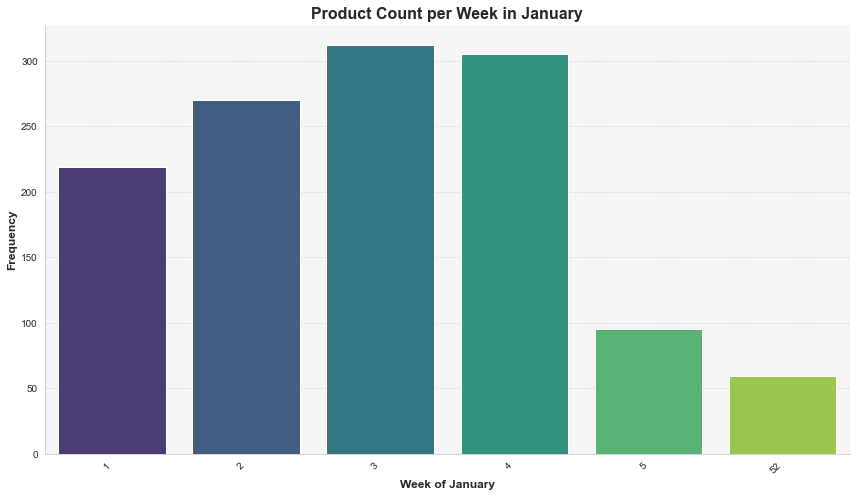

In [169]:
# Step 1: Convert 'createdAt' to datetime and set as index
product_count_per_day['createdAt'] = pd.to_datetime(product_count_per_day['createdAt'])
product_count_per_day.set_index('createdAt', inplace=True)

# Step 2: Resample by week and sum product_count
weekly_data = product_count_per_day.resample('W').sum()


# Step 3: Create the bar plot using Seaborn
plt.figure(figsize=(12, 7))  # Increase the figure size

# Use a modern color palette, 'viridis' is a good choice, but you can also try 'magma', 'plasma', or 'inferno'.
sns.set_palette('viridis')

# Create the bar plot
ax = sns.barplot(x=weekly_data.index.week, y='product_count', data=weekly_data)

# Add grid lines
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Use a different font style for the title and axis labels
plt.xlabel('Week of January', fontweight='bold', fontsize=12)
plt.ylabel('Frequency', fontweight='bold', fontsize=12)
plt.title('Product Count per Week in January', fontweight='bold', fontsize=16)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add a background color to the plot for a cleaner appearance
ax.set_facecolor('#f5f5f5')

# Remove the top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()

# # Step 3: Create the bar plot using Seaborn
# plt.figure(figsize=(10, 6))
# sns.barplot(x=weekly_data.index.week, y='product_count', data=weekly_data, palette='viridis')
# plt.xlabel('Week of January')
# plt.ylabel('Frequency')
# plt.title('Product Count per Week in January')
# plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()


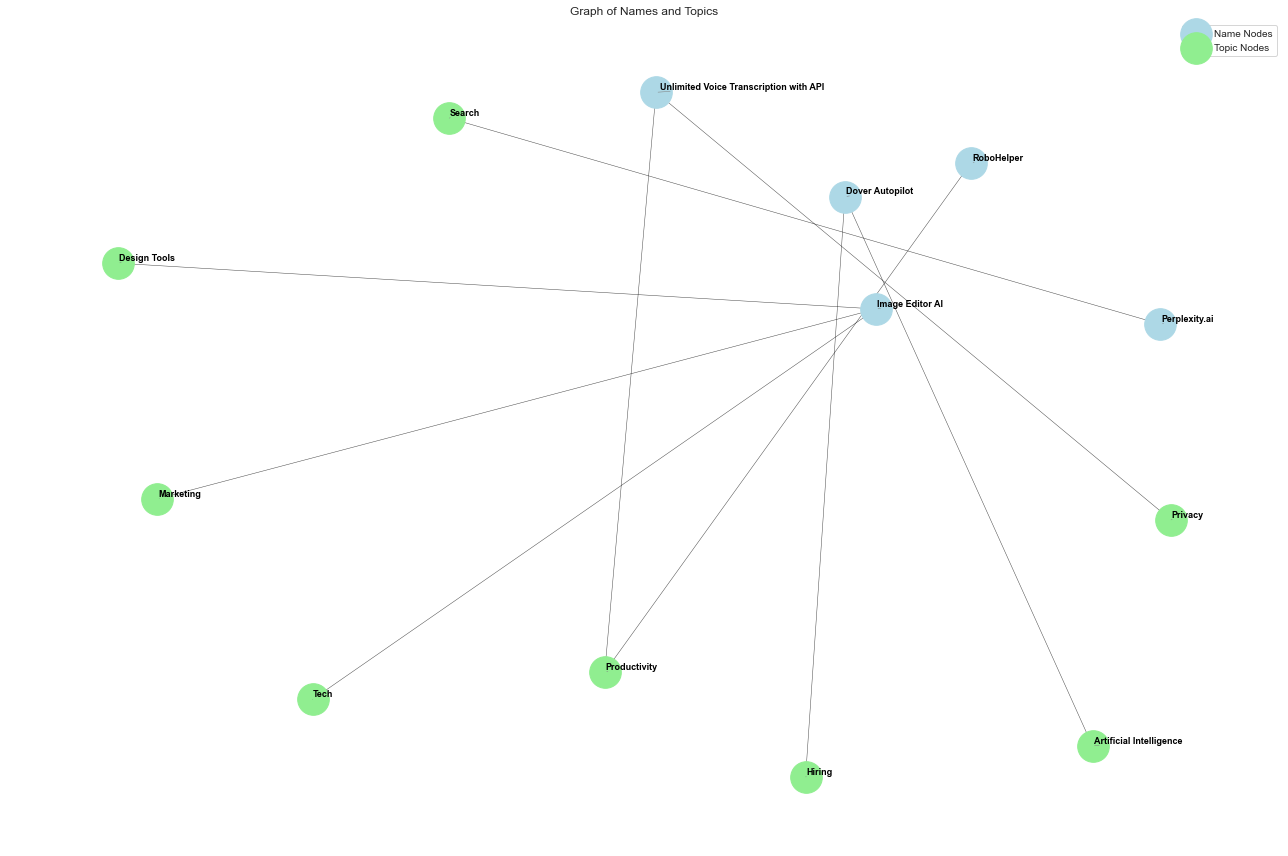

In [170]:
# Select only 'name' and 'topics' columns to create a new DataFrame
tmp_df = df[['name', 'topics']]
Graph_df = tmp_df.head(5)


# Create a directed graph
G = nx.DiGraph()

# Add nodes for names and topics
names = Graph_df['name'].tolist()
topics = Graph_df['topics'].str.split(', ').explode().tolist()
G.add_nodes_from(names, node_type='name')
G.add_nodes_from(topics, node_type='topic')

# Create edges between names and their corresponding topics
for index, row in Graph_df.iterrows():
    name = row['name']
    topic_list = row['topics'].split(', ')
    for topic in topic_list:
        G.add_edge(name, topic)

# # Position nodes for visualization
# pos = nx.spring_layout(G, seed=42)


# Set the graph layout using Kamada-Kawai layout algorithm
pos = nx.kamada_kawai_layout(G)


# Draw the graph
plt.figure(figsize=(18, 12))
name_nodes = [node for node, node_type in G.nodes(data='node_type') if node_type == 'name']
topic_nodes = [node for node, node_type in G.nodes(data='node_type') if node_type == 'topic']

# Draw nodes with different colors
nx.draw_networkx_nodes(G, pos, nodelist=name_nodes, node_color='lightblue', node_size=1000, label='Name Nodes')
nx.draw_networkx_nodes(G, pos, nodelist=topic_nodes, node_color='lightgreen', node_size=1000, label='Topic Nodes')

# Draw node labels using the 'adjust_text' library to prevent overlapping
name_labels = {node: node for node in name_nodes}
topic_labels = {node: node for node in topic_nodes}
all_labels = {**name_labels, **topic_labels}
text_objects = nx.draw_networkx_labels(G, pos, labels=all_labels, font_size=9, font_weight='bold')

# Convert the dict_values object to a list for subscripting
text_objects_list = list(text_objects.values())

# Adjust node labels to prevent overlapping
adjust_text(text_objects_list, arrowprops=dict(arrowstyle='-', color='grey', lw=0.5))

# Draw edges and legend
nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.7)
plt.title('Graph of Names and Topics')
plt.legend()
plt.axis('off')  # Turn off axis for better visualization
plt.tight_layout()
plt.show()

# Draw the graph
# plt.figure(figsize=(12, 8))
# name_nodes = [node for node, node_type in G.nodes(data='node_type') if node_type == 'name']
# topic_nodes = [node for node, node_type in G.nodes(data='node_type') if node_type == 'topic']
# nx.draw_networkx_nodes(G, pos, nodelist=name_nodes, node_color='lightblue', node_size=2000, label='Name Nodes')
# nx.draw_networkx_nodes(G, pos, nodelist=topic_nodes, node_color='lightgreen', node_size=2000, label='Topic Nodes')
# nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')
# nx.draw_networkx_edges(G, pos, width=0.5, alpha=0.7)
# plt.title('Graph of Names and Topics')
# plt.legend()
# plt.show()

# # Draw the graph
# plt.figure(figsize=(12, 8))
# nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold')
# plt.title('Graph of Names and Topics')
# plt.show()